## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

## 1. Import Library

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('Resume_Docx/')

['PeopleSoft', 'React JS Developer', 'SQL Developer', 'Workday']

## 2. Exctract the Text from Dataset

In [3]:
file_path1 = []
category1  = []
directory1 = 'Resume_Docx/PeopleSoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [4]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,PeopleSoft
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,PeopleSoft
2,PeopleSoft Database Administrator \n\nGangared...,PeopleSoft
3,Classification: Internal \n\nMurali \n\nExperi...,PeopleSoft
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",PeopleSoft
5,I \tI \n\nPROFILE SUMMARY\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
6,PEOPLESOFT ADMINISTRATOR \n\nSRINIVAS.K\n\nExp...,PeopleSoft
7,VARKALA VIKAS \n\n PeopleSoft Admin \n\nCareer...,PeopleSoft
8,Vinod Akkala \nPeopleSoft DBA Admin. \n\nProfe...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA \n\nGanesh All...,PeopleSoft


In [5]:
file_path2 = []
category2  = []
directory2 = 'Resume_Docx/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [6]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy \n\nCAREER OBJECTIVE: \n...,React JS Developer
3,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer
5,Ui-Developer/ React JS Developer \nNAME: KRISH...,React JS Developer
6,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
7,Naveen Sadhu \n\nTitle: software developer \nL...,React JS Developer
8,PROFILE \n\nSearching for the opportunity to b...,React JS Developer
9,PRAGNYA PATTNAIK\n\nExpertise:\n\n• \n\n• \n• ...,React JS Developer


In [7]:
file_path3 = []
category3  = []
directory3 = 'Resume_Docx/SQL Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [8]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \nSQL & MSBI Developer\n\...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI \nCAREER OBJECTIVE: \n\n•\n\n●Hav...,SQL Developer
3,KAMBALLA PRADEEP \n\nSYNOPSIS \n\n\t\tLooking ...,SQL Developer
4,Nazeer Basha\n\n\n\n Hyderabad\n\nSQL and Powe...,SQL Developer
5,Name : Neeraj Mishra \n\n Resume \n\n\n\n...,SQL Developer
6,SQL DEVELOPER \n\nName: - Bandi prem sai\n\n...,SQL Developer
7,SQL SERVER DEVELOPER \n\nPriyanka L \n\nProfes...,SQL Developer
8,SQL SERVER DEVELOPER \n\nP. Syam Kumar \n\nPro...,SQL Developer
9,RAJU PAVANA KUMARI \n\nProfessional Summary: \...,SQL Developer


In [9]:
file_path4 = []
category4  = []
directory4 = 'Resume_Docx/Workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [10]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M \nDOB: 06th March 1994 \n...,Workday
1,Name : Gopi Krishna Reddy \n\nPROFESSI...,Workday
2,Hari Krishna M \n\nSummary: \n\n•\n•\n\nA resu...,Workday
3,Harikrishna Akula \n\n\n\n\n\n\n\n\t\t Summary...,Workday
4,HIMA.MENDU \n\nCareer Objective \nTo continue ...,Workday
5,G Himaja \t\n\n\n\n\n\n\t\t\n\n\t\t\n\n\t\t\n\...,Workday
6,Name: J. Sumanth Royal. \n\nPROFESSIONAL SUMMA...,Workday
7,JYOTI VERMA \n\n\n\nPROFESSIONAL SUMMARY \n\n•...,Workday
8,Madeeswar A \n\nPROFILESUMMARY:\n\n\t✓Having a...,Workday
9,Mooraboyina Guravaiah \n\nWorkday Integration ...,Workday


## 3. Create a DataFrame

In [11]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator \n\nGangared...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal \n\nMurali \n\nExperi...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Workday Integration Consultant \n\nName ...,NaN,NaN,NaN,Workday
75,S R I K A N T H ( W O R K D A Y H C M C O N...,NaN,NaN,NaN,Workday
76,WORKDAY | HCM | FCM \n\nName Role \n\n: Kumar ...,NaN,NaN,NaN,Workday
77,Venkateswarlu.B \n\n\n\nWorkday Consultant\n\n...,NaN,NaN,NaN,Workday


In [12]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


### 3.1 Merge all Unnecessary column in One Column

In [13]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator \n\nGangared...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal \n\nMurali \n\nExperi...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,Workday Integration Consultant \n\nName ...,NaN,NaN,NaN,Workday,Workday
75,S R I K A N T H ( W O R K D A Y H C M C O N...,NaN,NaN,NaN,Workday,Workday
76,WORKDAY | HCM | FCM \n\nName Role \n\n: Kumar ...,NaN,NaN,NaN,Workday,Workday
77,Venkateswarlu.B \n\n\n\nWorkday Consultant\n\n...,NaN,NaN,NaN,Workday,Workday


In [14]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 3.2 Final Dataset

In [15]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\n\n\n\n To work in a globa...
1,PeopleSoft,G. Ananda Rayudu \n https://www.linkedin.com/i...
2,PeopleSoft,PeopleSoft Database Administrator \n\nGangared...
3,PeopleSoft,Classification: Internal \n\nMurali \n\nExperi...
4,PeopleSoft,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC..."
5,PeopleSoft,I \tI \n\nPROFILE SUMMARY\n\n\n\n\n\n\n\n\n\n\...
6,PeopleSoft,PEOPLESOFT ADMINISTRATOR \n\nSRINIVAS.K\n\nExp...
7,PeopleSoft,VARKALA VIKAS \n\n PeopleSoft Admin \n\nCareer...
8,PeopleSoft,Vinod Akkala \nPeopleSoft DBA Admin. \n\nProfe...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA \n\nGanesh All...


In [16]:
resume_data["Raw_Details"][4]

'Priyanka Ramadoss\n\n61/46, MountPleasant, \nCoonoor \nThe Nilgiris- 643102 \n\nCareer Objective \n\nToexcel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for. \n\nProfile Summary \n\nAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture \n\nProfessional Summary \n\nPeopleSoft Administrator (September 2016-Present) \n\n•\n•\n\n•\n•\n\n•\n•\n•\n•\n•\n\n•\n\n•\n\n•\n•\n•\n•\n\n•\n•\n•\n•\n•\n•\n•\n\nExperience in PeopleSoft Administration for Finance application. \n\nProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers. \n\nActive monitoring in Non production databases and applications. \n\nKnowledgeable on PeopleSoft migrations using application designer, data mover and taking compare re

### 3.3 Save new CSV File

In [17]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## 4. Data Understanding

In [18]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\n\n\n\n To work in a globa...
1,PeopleSoft,G. Ananda Rayudu \n https://www.linkedin.com/i...
2,PeopleSoft,PeopleSoft Database Administrator \n\nGangared...
3,PeopleSoft,Classification: Internal \n\nMurali \n\nExperi...
4,PeopleSoft,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC..."
...,...,...
74,Workday,Workday Integration Consultant \n\nName ...
75,Workday,S R I K A N T H ( W O R K D A Y H C M C O N...
76,Workday,WORKDAY | HCM | FCM \n\nName Role \n\n: Kumar ...
77,Workday,Venkateswarlu.B \n\n\n\nWorkday Consultant\n\n...


In [19]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
58,Workday,Chinna Subbarayudu M \nDOB: 06th March 1994 \n...
59,Workday,Name : Gopi Krishna Reddy \n\nPROFESSI...
60,Workday,Hari Krishna M \n\nSummary: \n\n•\n•\n\nA resu...
61,Workday,Harikrishna Akula \n\n\n\n\n\n\n\n\t\t Summary...
62,Workday,HIMA.MENDU \n\nCareer Objective \nTo continue ...
63,Workday,G Himaja \t\n\n\n\n\n\n\t\t\n\n\t\t\n\n\t\t\n\...
64,Workday,Name: J. Sumanth Royal. \n\nPROFESSIONAL SUMMA...
65,Workday,JYOTI VERMA \n\n\n\nPROFESSIONAL SUMMARY \n\n•...
66,Workday,Madeeswar A \n\nPROFILESUMMARY:\n\n\t✓Having a...
67,Workday,Mooraboyina Guravaiah \n\nWorkday Integration ...


In [20]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### 4.1 Number of Words in each Resume

In [21]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,999
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,1229
2,PeopleSoft Database Administrator \n\nGangared...,1115
3,Classification: Internal \n\nMurali \n\nExperi...,629
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",653


### 4.2 Number of Characters

In [22]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,7749
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,8063
2,PeopleSoft Database Administrator \n\nGangared...,6484
3,Classification: Internal \n\nMurali \n\nExperi...,4958
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",5191


### 4.3 Number of Stopwords

In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,190
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,188
2,PeopleSoft Database Administrator \n\nGangared...,177
3,Classification: Internal \n\nMurali \n\nExperi...,114
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",123


### 4.4 Number of Numerics

In [24]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\n\n\n\n To work in a globa...,4
1,G. Ananda Rayudu \n https://www.linkedin.com/i...,6
2,PeopleSoft Database Administrator \n\nGangared...,4
3,Classification: Internal \n\nMurali \n\nExperi...,7
4,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",7


In [25]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\n\n\n\n To work in a globa...,999,7749,190,4
1,PeopleSoft,G. Ananda Rayudu \n https://www.linkedin.com/i...,1229,8063,188,6
2,PeopleSoft,PeopleSoft Database Administrator \n\nGangared...,1115,6484,177,4
3,PeopleSoft,Classification: Internal \n\nMurali \n\nExperi...,629,4958,114,7
4,PeopleSoft,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",653,5191,123,7
...,...,...,...,...,...,...
74,Workday,Workday Integration Consultant \n\nName ...,920,7196,197,3
75,Workday,S R I K A N T H ( W O R K D A Y H C M C O N...,1009,6726,187,8
76,Workday,WORKDAY | HCM | FCM \n\nName Role \n\n: Kumar ...,1150,8462,236,6
77,Workday,Venkateswarlu.B \n\n\n\nWorkday Consultant\n\n...,878,6758,193,7


## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [26]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [27]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 5.2 Clean Text from Resume

In [28]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\n\n\n\n To work in a globa...,anubhav kumar singh work globally competitive ...
1,PeopleSoft,G. Ananda Rayudu \n https://www.linkedin.com/i...,ananda rayudu profile summary years experience...
2,PeopleSoft,PeopleSoft Database Administrator \n\nGangared...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal \n\nMurali \n\nExperi...,classification internal murali experience summ...
4,PeopleSoft,"Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,Workday Integration Consultant \n\nName ...,workday integration consultant name sri krishn...
75,Workday,S R I K A N T H ( W O R K D A Y H C M C O N...,seeking suitable positions workday hcm techno ...
76,Workday,WORKDAY | HCM | FCM \n\nName Role \n\n: Kumar ...,workday hcm fcm name role kumar workday consul...
77,Workday,Venkateswarlu.B \n\n\n\nWorkday Consultant\n\n...,venkateswarlu workday consultant professional ...


### 5.3 Save the Clean Data in new CSV File

In [29]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [30]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [31]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [32]:
resume_data.Resume_Details[5]

'profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marksinthstandard scored inthstandard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya financials role associate environment windows server

## 6. Named Entity Recognition (NER)

In [33]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 582), ('peoplesoft', 451), ('workday', 427), ('application', 415), ('using', 394), ('server', 358), ('data', 331), ('reports', 326), ('project', 323), ('sql', 280), ('business', 270), ('web', 248), ('database', 243), ('process', 234), ('worked', 217), ('knowledge', 213), ('client', 196), ('involved', 191), ('system', 189), ('integrations', 189), ('tools', 188), ('integration', 183), ('hcm', 180), ('like', 178), ('support', 177), ('good', 167), ('skills', 164), ('creating', 164), ('development', 164), ('team', 162), ('working', 158), ('people', 157), ('technical', 156), ('report', 155), ('services', 155), ('design', 154), ('servers', 151), ('created', 150), ('testing', 147), ('various', 146), ('responsibilities', 145), ('react', 145), ('role', 142), ('oracle', 140), ('environment', 139), ('developer', 135), ('management', 134), ('eib', 134), ('production', 133), ('security', 133)]


## 7. Parts Of Speech (POS) Tagging

In [34]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [35]:
for token in doc_block[:30]:
    print(token,token.pos_)  

pplication ADJ
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN
shell NOUN
scripting PROPN
linux PROPN
peoplesoft PROPN
administration PROPN
jenkins PROPN
ansible ADJ
project NOUN
people NOUN
tools NOUN
upgrade VERB
hcm PROPN
application NOUN
upgrade NOUN
project NOUN
migration NOUN
applications VERB
ntt NOUN
cloud ADJ
premises PROPN
aws PROPN
cloud PROPN


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [36]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulnerabilities', 'reported', 'security', 'teams', 'vulnerability', 'remediation', 'vulnerability', 'team', 'worked', 'update', 'manager', 'installation', '

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [37]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,529
1,application,414
2,using,384
3,workday,348
4,reports,326
5,data,306
6,project,288
7,business,257
8,server,243
9,web,234


### 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

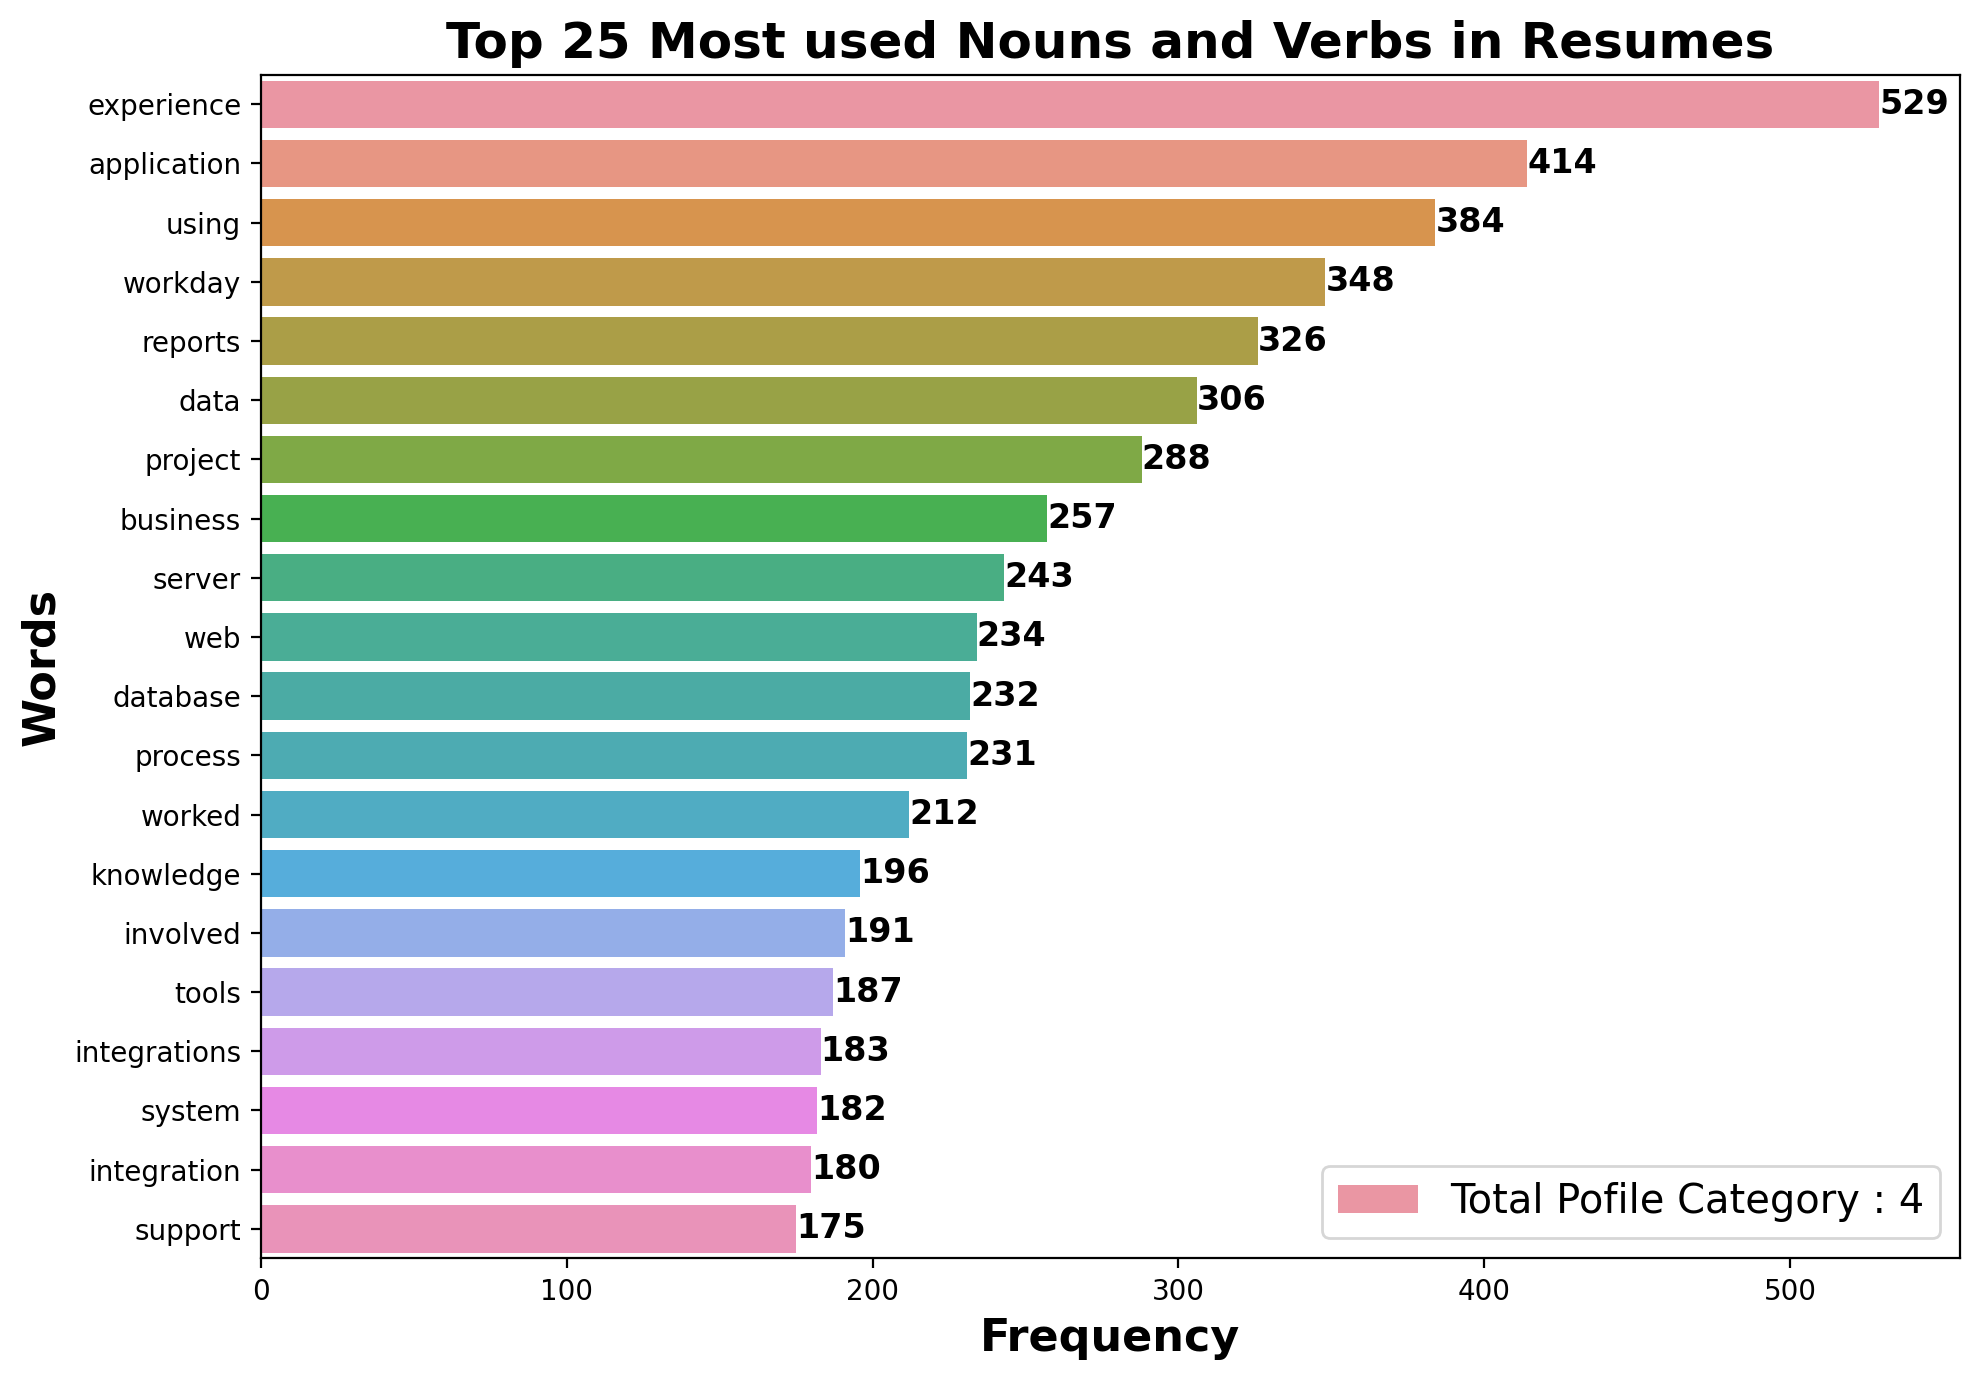

In [38]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Nouns_Verbs_Bar', dpi = 500)

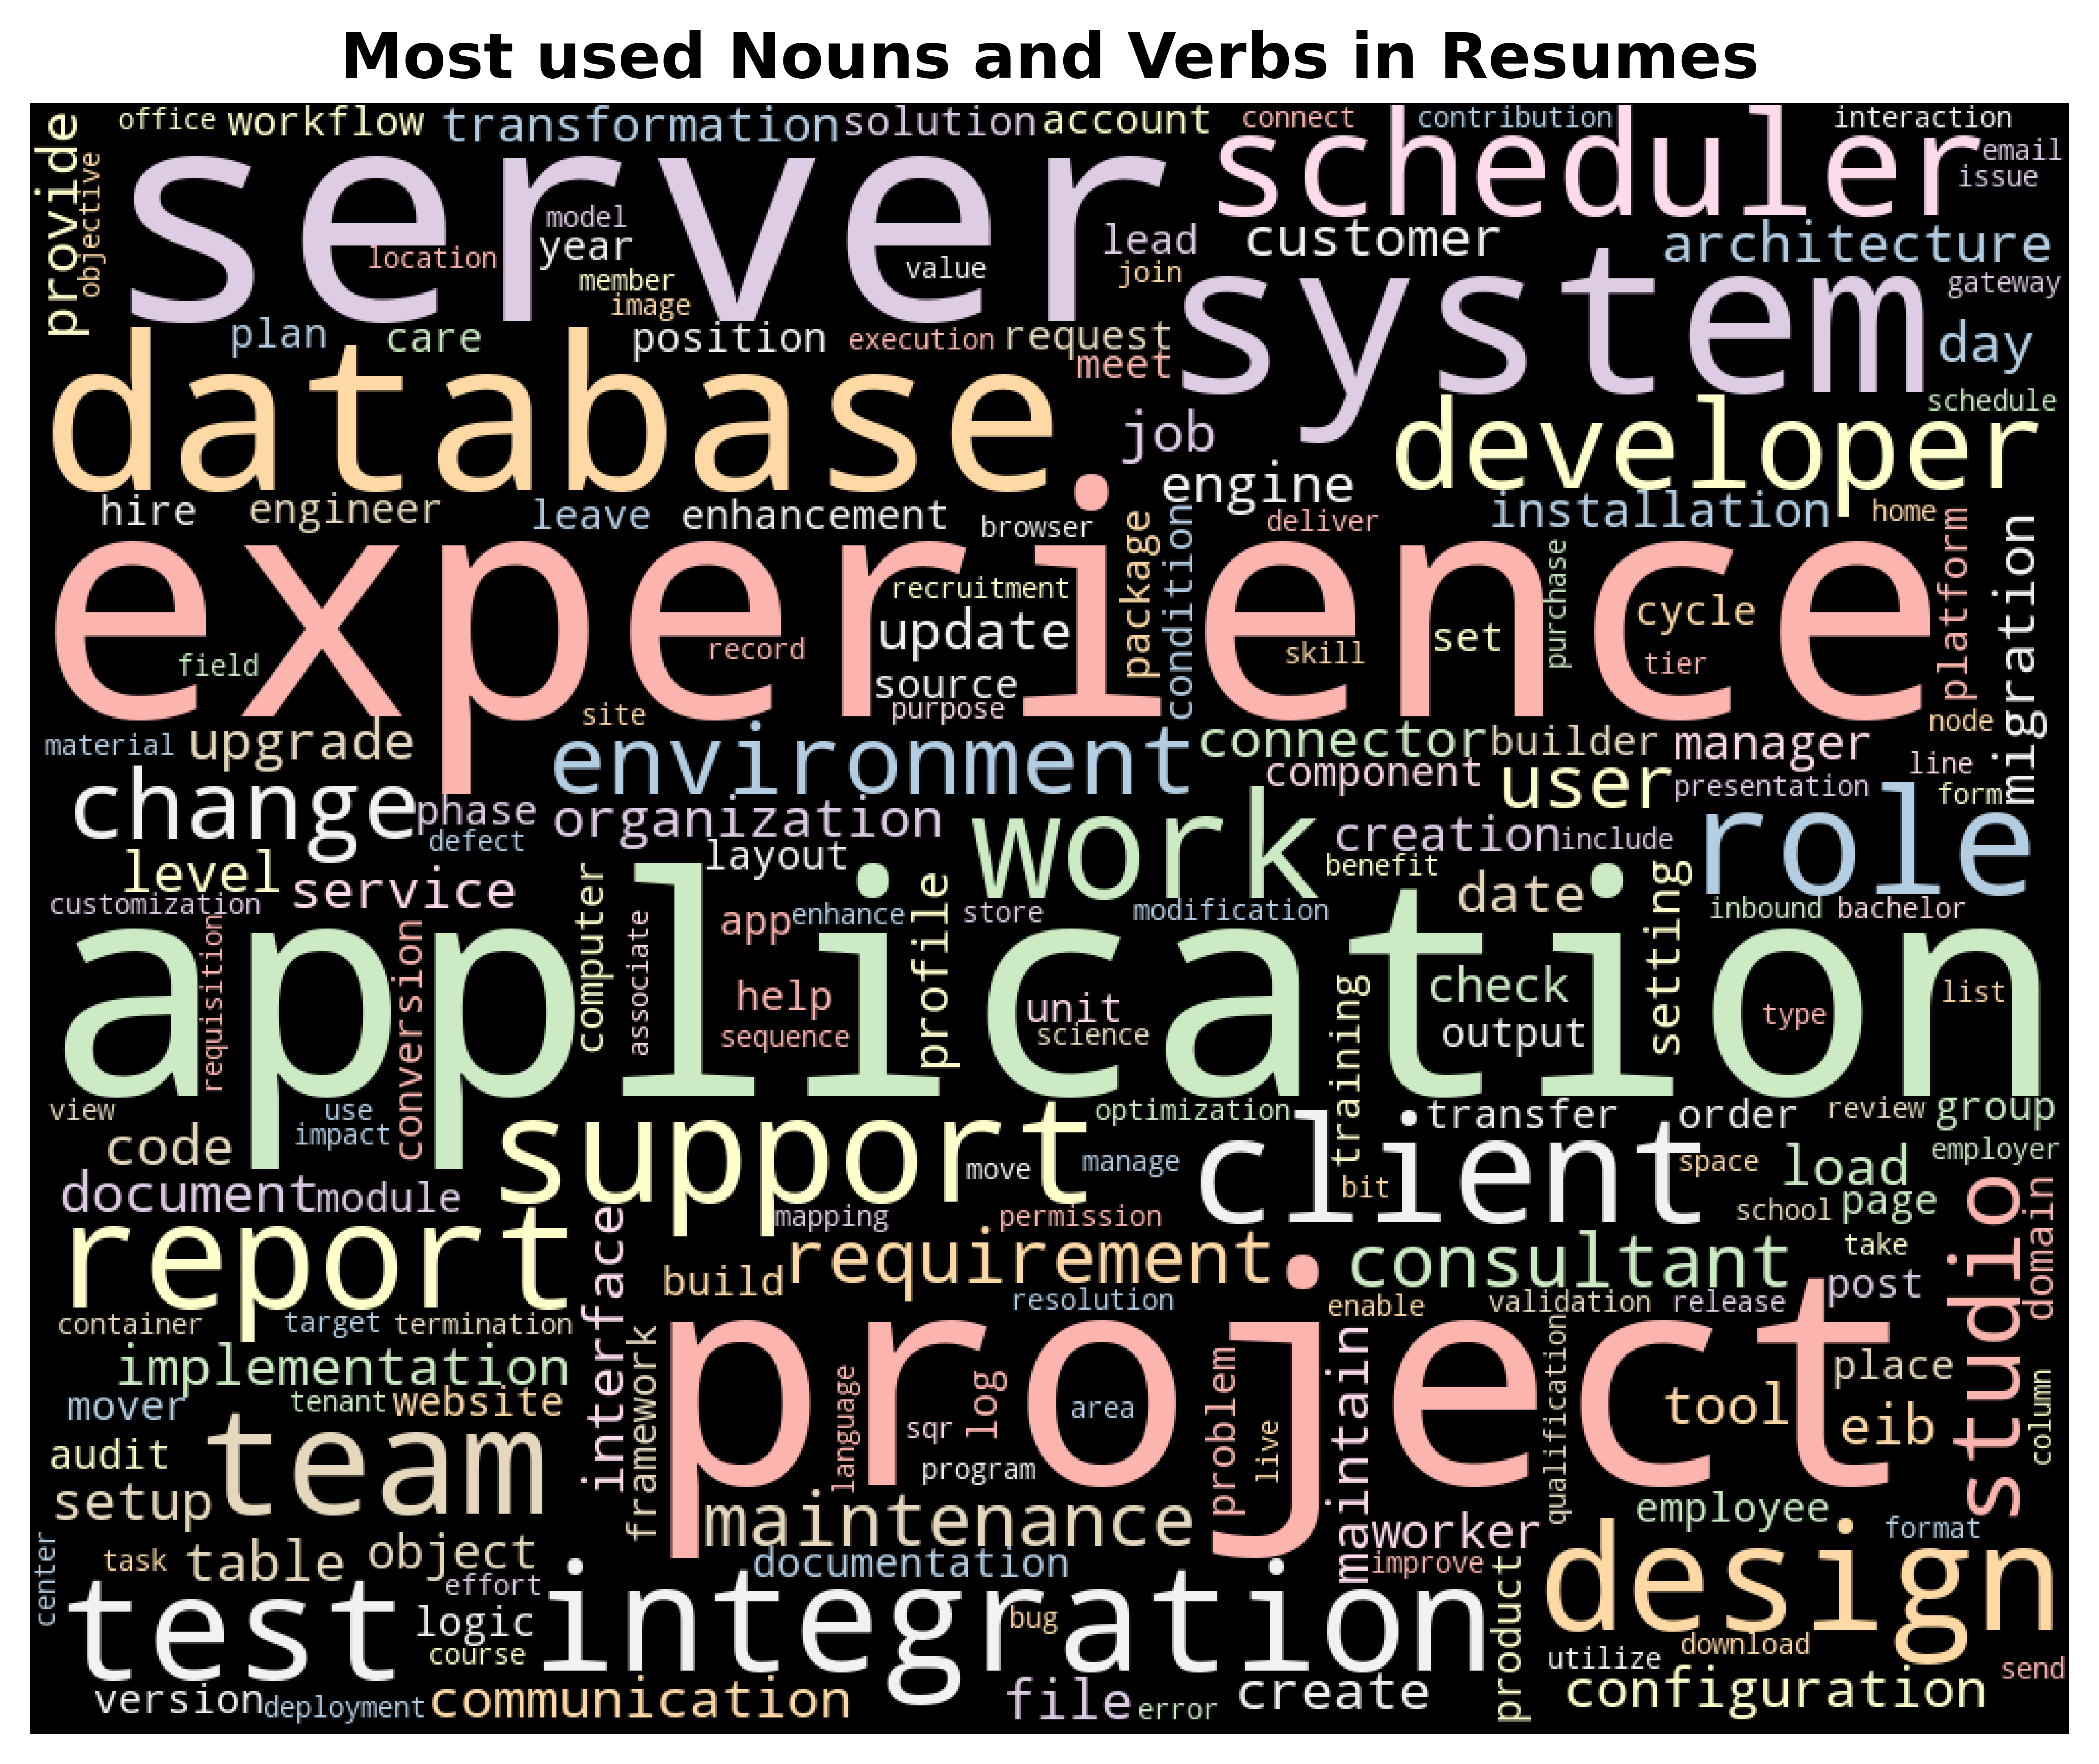

In [39]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()

# THE END !!!